In [1]:
from __future__ import print_function
import cobra
import cobra.test
from os.path import join
from cobra.medium import minimal_medium
from cobra.flux_analysis import production_envelope
import numpy as np
import math
cobra.DictList

#iRhto1108N_model with biomass as objective
iRhto1108N_model = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\iRhto_memote-master", "iRhto.xml"))

In [8]:
carbon_source = ["EX_glc__D_e", "EX_xyl__D_e", "EX_ac_e", "EX_glyc_e", "EX_fru_e", "EX_man_e", "EX_sucr_e", "EX_cellb_e"]
mass = [180, 150, 82, 92, 180, 180, 342, 342]
carbon_amount = [6, 5, 2, 3, 6, 6, 12, 12]
dic = {}
for i in range(8):
    with iRhto1108N_model:
        medium = iRhto1108N_model.medium
        medium["EX_glc__D_e"] = 0
        medium[carbon_source[i]] = 5
        #carbon_amount[0]*iRhto1108N_model.medium["EX_glc__D_e"]*mass[i]/(mass[0]*carbon_amount[i])
        iRhto1108N_model.medium = medium
#         if i == 2:
#             print(medium)
        dic[carbon_source[i]] = iRhto1108N_model.slim_optimize()
dic


{'EX_glc__D_e': 0.3753060889842411,
 'EX_xyl__D_e': 0.31235676260621376,
 'EX_ac_e': 0.11170578344737293,
 'EX_glyc_e': 0.21668773699236693,
 'EX_fru_e': 0.37530608898426226,
 'EX_man_e': 0.37530608898424345,
 'EX_sucr_e': 0.7530020491564821,
 'EX_cellb_e': 0.753002049156487}

In [6]:
iRhto1108N_model.medium

{'EX_nh4_e': 1000.0,
 'EX_glc__D_e': 5.0,
 'EX_fe2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_btn_c': 0.01}

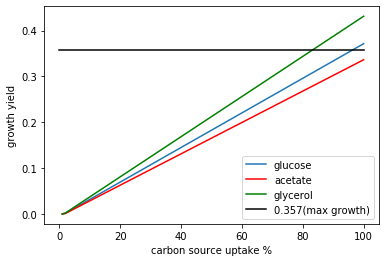

In [3]:
import matplotlib
import matplotlib.pyplot as plt
acetate = []
ace_x = np.linspace(1, 100, 100)
glycerol = []
gly_x = np.linspace(1, 100, 100)
glucose = []
glu_x = np.linspace(1, 100, 100)

for i in range(100):
    with iRhto1108N_model:
        medium = iRhto1108N_model.medium
        medium["EX_glc__D_e"] = 0
        if i != 0:
            medium["EX_ac_e"] = i*15/100
            iRhto1108N_model.medium = medium
            acetate.append(iRhto1108N_model.slim_optimize())
        else:
            acetate.append(0)

for i in range(100):
    with iRhto1108N_model:
        medium = iRhto1108N_model.medium
        medium["EX_glc__D_e"] = 0
        if i != 0:
            medium["EX_glyc_e"] = i*10/100
            iRhto1108N_model.medium = medium
            glycerol.append(iRhto1108N_model.slim_optimize())
        else:
            glycerol.append(0)
            
for i in range(100):
    with iRhto1108N_model:
        medium = iRhto1108N_model.medium
        if i != 0:
            medium["EX_glc__D_e"] = i*5/100
            iRhto1108N_model.medium = medium
            glucose.append(iRhto1108N_model.slim_optimize())
        else:
            glucose.append(0)

plt.plot(ace_x, glucose, label = "glucose")
plt.plot(ace_x, acetate, color = "red", label = "acetate")
plt.plot(ace_x, glycerol, color = "green", label = "glycerol")
x_coordinates = [0, 100]
y_coordinates = [0.357, 0.357]
plt.plot(x_coordinates, y_coordinates, color = "black", label = "0.357(max growth)")
plt.xlabel("carbon source uptake %")
plt.ylabel("growth yield")
plt.legend()